In [100]:
pip install investpy  #install investpy

In [101]:
import investpy as inp
import pandas as pd
res = inp.search_quotes(text='bank of america',
                      products=['stocks'],
                      countries=['united states'],
                      n_results=10
                      )

In [102]:
for stk in res[:1]:
  
  stk.retrieve_historical_data(from_date='01/01/2010', to_date='31/12/2020')
  print(stk.data)
  df = pd.DataFrame(stk.data)
  

             Open   High    Low  Close     Volume
Date                                             
2010-01-04  15.24  15.75  15.12  15.69  180845104
2010-01-05  15.74  16.21  15.70  16.20  209521216
2010-01-06  16.21  16.54  16.03  16.39  205257888
2010-01-07  16.68  17.18  16.51  16.93  320868352
2010-01-08  16.98  17.10  16.63  16.78  220104608
...           ...    ...    ...    ...        ...
2020-12-24  30.27  30.27  29.74  29.96   22632272
2020-12-28  30.17  30.54  29.99  30.13   32861178
2020-12-29  30.12  30.25  29.93  30.01   33291878
2020-12-30  30.00  30.22  29.94  29.98   26370148
2020-12-31  30.01  30.39  29.90  30.31   28716038

[2769 rows x 5 columns]


In [103]:
df_i = df.index
df_close = df[['Close']]
df_close


,Close
Date,
2010-01-04,15.69
2010-01-05,16.20
2010-01-06,16.39
2010-01-07,16.93
2010-01-08,16.78
...,...
2020-12-24,29.96
2020-12-28,30.13
2020-12-29,30.01


Text(0.5, 1.0, 'BofA stock price ')

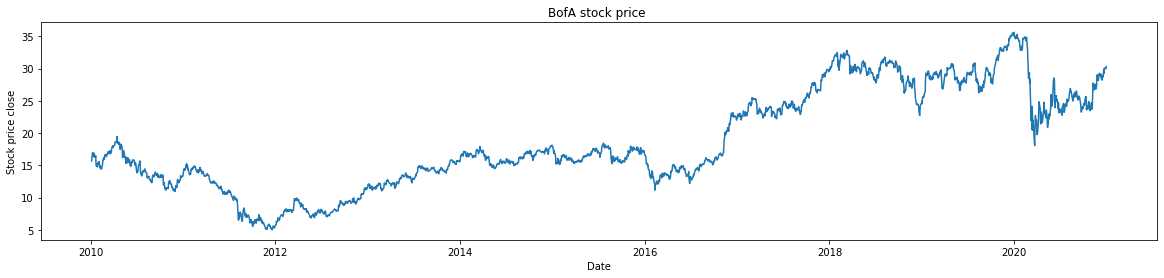

In [104]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 4))
plt.plot(df_close )
plt.xlabel("Date")
plt.ylabel("Stock price close")
plt.title("BofA stock price ")

In [105]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_total = scaler.fit_transform(df_close)
df_total

array([[0.34910277],
       [0.36574225],
       [0.37194127],
       ...,
       [0.81631321],
       [0.81533442],
       [0.82610114]])

In [106]:
df_train = df_close[:'2019-12-31']
df_train.shape[0]


2516

In [ ]:
X_train = []
y = []
for i in range(60 , df_train.shape[0]):
  X_train.append(df_total[i-60:i])
  y.append(df_total[i])
X_train


In [108]:
import numpy as np
X_tr_t = np.array(X_train)
Y_tr_t = np.array(y)
print(X_tr_t.shape[0])
print(X_tr_t.shape[1])
X_tr_t = np.reshape(X_tr_t, (X_tr_t.shape[0], X_tr_t.shape[1], 1))
Y_tr_t.shape

2456
60


(2456, 1)

In [109]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

model = Sequential()
model.add(LSTM(300, input_shape=(X_tr_t.shape[1], X_tr_t.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(300))
model.add(Dropout(0.2))
model.add(Dense(Y_tr_t.shape[1], activation='relu'))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_tr_t, Y_tr_t, epochs=200, batch_size=30)

Epoch 1/200
82/82 [==============================] - 4s 12ms/step - loss: 0.0325
Epoch 2/200
82/82 [==============================] - 1s 10ms/step - loss: 9.5292e-04
Epoch 3/200
82/82 [==============================] - 1s 10ms/step - loss: 7.7071e-04
Epoch 4/200
82/82 [==============================] - 1s 10ms/step - loss: 0.0011
Epoch 5/200
82/82 [==============================] - 1s 10ms/step - loss: 8.5531e-04
Epoch 6/200
82/82 [==============================] - 1s 10ms/step - loss: 8.5717e-04
Epoch 7/200
82/82 [==============================] - 1s 10ms/step - loss: 7.5667e-04
Epoch 8/200
82/82 [==============================] - 1s 10ms/step - loss: 7.8890e-04
Epoch 9/200
82/82 [==============================] - 1s 10ms/step - loss: 7.2053e-04
Epoch 10/200
82/82 [==============================] - 1s 11ms/step - loss: 8.1558e-04
Epoch 11/200
82/82 [==============================] - 1s 10ms/step - loss: 6.5437e-04
Epoch 12/200
82/82 [==============================] - 1s 10ms/step - lo

In [110]:
real_val = df_close['2020-01-01':]
real_val
df_i_r = real_val.index
df_i_r

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2020-12-17', '2020-12-18', '2020-12-21', '2020-12-22',
               '2020-12-23', '2020-12-24', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='Date', length=253, freq=None)

In [111]:
pred = []
for i in range (df_train.shape[0] , df_total.shape[0]):
  test = []
  test.append(df_total[i-60:i])
  X_test = np.array(test)
  X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
  pre = model.predict(X_test)
  pred.append(pre[0])
  df_total[i] = pre[0][0]



In [112]:
pred = pd.DataFrame(pred)
pred = scaler.inverse_transform(pred)
pred = pd.DataFrame(pred)
real_val.reset_index()


,Date,Close
0,2020-01-02,35.64
1,2020-01-03,34.90
2,2020-01-06,34.85
3,2020-01-07,34.62
4,2020-01-08,34.97
...,...,...
248,2020-12-24,29.96
249,2020-12-28,30.13
250,2020-12-29,30.01
251,2020-12-30,29.98


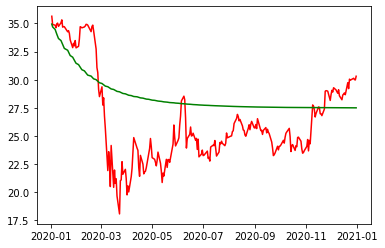

In [113]:
pred['date'] = pd.to_datetime(df_i_r)
pred.set_index('date', inplace=True)
plt.plot(real_val , color = 'red')
plt.plot(pred , color= 'green')